In [23]:
from preprocessing import *
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pathlib as p
DATA_DIR = p.Path.home()/"data"/"bobsrepository"
LR2_DIR = DATA_DIR/"LR"
LR4_DIR = DATA_DIR/"LR4"
t2_files = sorted(DATA_DIR.rglob("*T2w.nii.gz"))
t1_files = sorted(DATA_DIR.rglob("*T1w.nii.gz"))
t2_lr_files = sorted(LR2_DIR.rglob("*T2w_LR.nii.gz"))
t2_lr4_files = sorted(LR4_DIR.rglob("*T2w_LR4.nii.gz"))




In [21]:
coregistered_dir = DATA_DIR/"coregistered"/"T2GT"
t2_coregistered_files = sorted(coregistered_dir.rglob("*T2w.nii.gz"))
print(nib.load(t2_coregistered_files[8]).header)
print(nib.load(t2_files[10]).header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 16384
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 182 218 182   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'2501.4 2025-04-22T09:56:22+01:00')
aux_file        : np.bytes_(b'')
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffs

In [24]:
#Apply flirt:

for i in range(len(t2_files)):
    apply_FLIRT(t2_lr4_files[i], t1_files[0], DATA_DIR/"coregistered"/"T2LR4"/t2_lr4_files[i].name)



Python(49913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49925) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49954) Malloc

IndexError: list index out of range

In [3]:
#AUGMENTING

for f in t2_files:
    lr = create_LR_img(nib.load(f).get_fdata(), 4, start_slice=1)
    lr_nib = nib.Nifti1Image(lr, nib.load(f).affine)
    nib.save(lr_nib, SAVE_DIR/f.name.replace("T2w","T2w_LR4"))

In [ ]:
t2_lr_list = []
for t2_file in t2_files:
    t2_lr = create_LR_nifti(nib.load(t2_file), 2)
    #save nifti but with new name ending with T2w_LR.nii.gz in folder LR2
    save_path = os.path.join(SAVE_DIR, t2_file.name.replace("T2w.nii.gz", "T2w_LR.nii.gz"))
    nib.save(t2_lr, save_path)
    

print(t2_lr.header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 182 218  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'5.0.10')
aux_file        : np.bytes_(b'')
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z 

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  3 192 224 192   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 95.0
qoffset_y       : -129.0
qoffset_z 

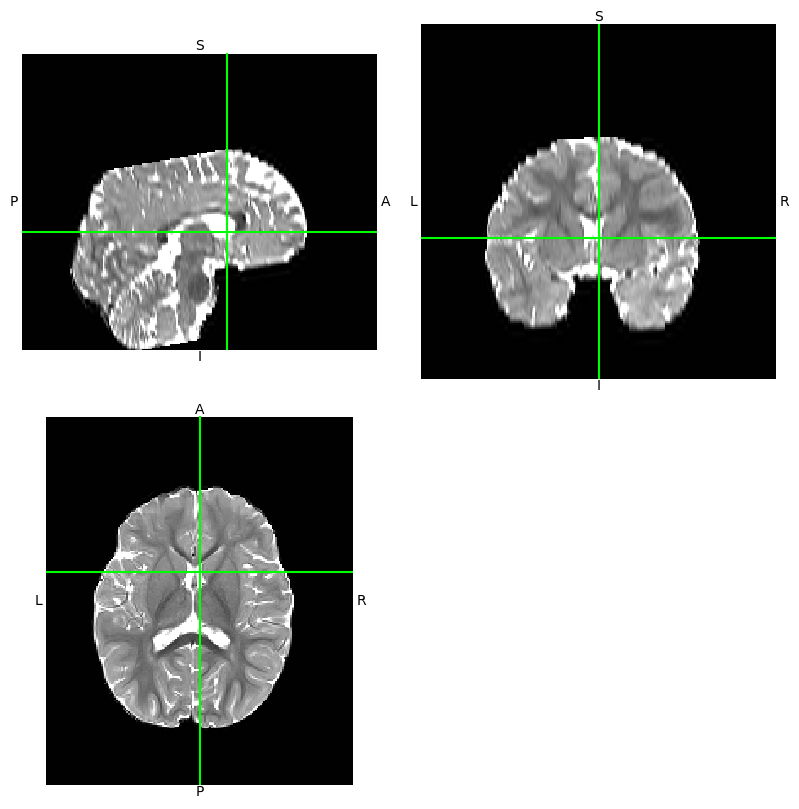

In [21]:
test_nifti = nib.load("/Users/al1612le/zenodo_upload_v2/s0001/t2.nii.gz")
#print(test_nifti.header)

ref_img = nib.load(t1_files[0])
test_nifti = scale_to_reference_img(test_nifti, ref_img)
#print(test_nifti.header)
test_nifti.orthoview()

test_nifti = pad_to_shape(test_nifti, (192,224,192))
print(test_nifti.header)
test_nifti_patches = extract_3D_patches(test_nifti.get_fdata(), (64,64,64), stride=(32,32,32))